# Анализ данных о продажах компьютерных игр и определение закономерностей, влияющих на успешность игры

## Изучение данных

### Обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


В датасете 16 715 строк и 11 столбцов.

Согласно документации к данным:

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Посмотрим, уникальные значения по столбцам: 

- какие жанры игр представлены в датасете


In [4]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

- какие рейтинги представлены в датасете

In [5]:
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Данные рейтинги обозначают следующее:

- "EC" ("Early childhood") — Для детей младшего возраста
- "E" ("Everyone") — Для всех
- "E10+" ("Everyone 10 and older") — Для всех от 10 лет и старше
- "K-A" ("Kids to Adults") - был заменен на "E" 
- "T" ("Teen") — Подросткам
- "M" ("Mature") — Для взрослых
- "AO" ("Adults Only 18+") — Только для взрослых
- "RP" ("Rating Pending") — Рейтинг ожидается

In [6]:
display(data['User_Score'].unique())
display(data['Critic_Score'].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Значения в `Critic_Score` целые, но имеют вещественный тип. Скорректируем в следующем разделе.

Посмотрим уникальные значения в столбце `Name`

In [7]:
display(data['Name'].unique())
len(data['Name'].unique())

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

11560

Проверим датасет на наличие явных дубликатов.

In [8]:
data.duplicated().sum()

0

### Выводы

Видим следующее:

1. разные регистры в названии столбцов
2. некорректные типы данных в столбцах `Year_of_Release`, `Critic_Score` и  `User_Score`.
3. явные дубликаты отсутствуют, но есть неявный дубликат в рейтингах и есть повторы названии игр.
4. пропуски в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`.

## Предобработка данных

### Изменение регистра в названии столбцов

In [9]:
data.columns = data.columns.str.lower()

In [10]:
data['genre'] = data['genre'].str.lower()

In [11]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Изменение типов данных

Приведем значения в столбцах `year_of_release` и `critic_score` к целым числам.

In [12]:
data['year_of_release'] = data['year_of_release'].astype("Int64")
#data['critic_score'] = data['critic_score'].astype("Int64")

Приведем численные значения в столбце `user_score` к вещественным числам. Предварительно заменим строки `tbd` на NaN.

In [13]:
data = data.replace('tbd', np.NaN)

In [14]:
data['user_score'] = data['user_score'].astype('float64')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Устранения неявных дубликатов

Рейтинги "E" и "K-A" показывают одну и ту же возрастную категорию. При этом "K-A" - это устаревшая версия. Заменим все ее упоминания на "E".

In [16]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Категории AO(Adults Only 18+ - только для взрослых) и М ("Mature" - для взрослых) по сути являются одной и той же категории. Объединим их в категорию М.

Категорию EC (Early Childhood - для детей от 3х лет) можно отнести к играм категории E (игры для всех возрастов).

Таким образом мы сможем сократить количество категорий.

In [18]:
data = data.replace(['K-A', 'АО', 'EC'], ['E', 'M', 'E'])

Посмотрим, почему у нас количество уникальных названий игр отличается от общего количества значений в столбце.

In [19]:
data['name'].value_counts()

Need for Speed: Most Wanted          12
LEGO Marvel Super Heroes              9
FIFA 14                               9
Madden NFL 07                         9
Ratatouille                           9
                                     ..
Slam Dunk: Yonkyo Taiketsu!!          1
Bomberman 2                           1
War of the Monsters                   1
Hero's Saga Laevatein Tactics         1
Dragon Ball Z: Tenkaichi Tag Team     1
Name: name, Length: 11559, dtype: int64

In [20]:
data.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005,racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Видим на примере Need for Speed: Most Wanted, что у одна игры может быть портирована на нескольких платформах и переездаваться повторно (например, на PC). Значит, дубликатов действительно нет.

### Заполнение пропусков

Рассмотрим пропуски в столбце `name`.

In [21]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего 2 строки без названия игры, жанра и рейтингов. Думаю, удаление этих строк не сильно повлияет на результат.

In [22]:
data = data.dropna(subset=['name'])

Пропуски в столбцах с оценками критиков и пользователей `critic_score` и  `user_score` заполнять не будем. Т.к. их очень много (больше 50%) и заполнение медианой или средним значением сильно повлияет на распределение значений.

Для заполнения пропусков в столбце с годом выпуска игры необходимо вручную проверить каждую игру. Используя данные в таблице, высчитать год выпуска игры невозможно. Обратимся к тому, кто выдал нам данные, чтобы он закончил работу)

Пропуски в столбе `rating` заменим на RP (Рейтинг ожидается).

In [23]:
data['rating'] = data['rating'].fillna('RP')

In [24]:
data['rating'].isna().sum()

0

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [26]:
data[data['year_of_release'].isna()]['platform'].unique()

array(['PS2', 'Wii', '2600', 'X360', 'GBA', 'PC', 'PS3', 'PS', 'PSP',
       'XB', 'GB', 'DS', 'GC', '3DS', 'N64', 'PSV'], dtype=object)

In [27]:
data[data['year_of_release'].isna()]['platform'].value_counts()

Wii     34
PS2     34
X360    30
DS      30
PS3     25
XB      21
PC      17
2600    17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
PSV      1
GB       1
Name: platform, dtype: int64

In [28]:
data.query('(platform == "2600") and (year_of_release.isnull())').sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1506,Adventure,2600,<NA>,adventure,1.21,0.08,0.0,0.01,NaN,NaN,RP
2106,Air-Sea Battle,2600,<NA>,shooter,0.91,0.06,0.0,0.01,NaN,NaN,RP
7354,Breakaway IV,2600,<NA>,puzzle,0.20,0.01,0.0,0.00,NaN,NaN,RP
4220,Circus Atari,2600,<NA>,action,0.43,0.03,0.0,0.00,NaN,NaN,RP
1585,Combat,2600,<NA>,action,1.17,0.07,0.0,0.01,NaN,NaN,RP
5642,Dragster,2600,<NA>,racing,0.30,0.02,0.0,0.00,NaN,NaN,RP
3883,Fishing Derby,2600,<NA>,sports,0.48,0.03,0.0,0.01,NaN,NaN,RP
6299,Flag Capture,2600,<NA>,action,0.25,0.02,0.0,0.00,NaN,NaN,RP
7353,Ghostbusters II,2600,<NA>,action,0.20,0.01,0.0,0.00,NaN,NaN,RP
5041,Hangman,2600,<NA>,puzzle,0.35,0.02,0.0,0.00,NaN,NaN,RP


In [29]:
# check
data['rating'].value_counts()

RP      6767
E       4001
T       2961
M       1563
E10+    1420
AO         1
Name: rating, dtype: int64

## Исследовательский анализ данных

### Распределение выпуска игр по годам 

Посмотрим, сколько игр выпускалось в разные годы.

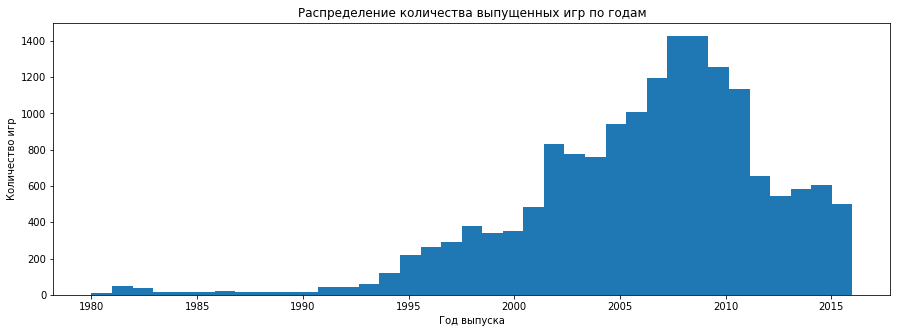

In [30]:
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(data[data['year_of_release'].notna()]['year_of_release'], bins = 37)
ax.set_title('Распределение количества выпущенных игр по годам')
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество игр');

In [31]:
data['year_of_release'].value_counts().sort_index()

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64

По графику видим, что до 1993 года игры почти не выпускались, т.к. игровая индустрия только зарождалась. А вот позднее количество выпущенных игр начало стремительно расти.

Отфильтруем игры  до 1993 года, и будем работать уже только с теми, что вышли позже. 

In [32]:
data = data.query('year_of_release > 1993')

### Динамика продаж игр по каждой платформе

Сначала определим суммарные продажи игр.

In [33]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [34]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
6,New Super Mario Bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80


Посмотрим, какие для каких платформ было продано больше всего игр. Выберем из них 10 самых успешных.

In [35]:
(data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
         .sort_values(by='total_sales', ascending=False).head(10))

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Видим, что рынок поделен между 3 мега-команиями: Sony, Nintendo и Microsoft.

И похоже, что Sony захватили мир.
На первом месте PlayStation 2, на третьем PlayStation 3. И еще 3 приставки (PSP, PlayStation 4 и PlayStation 1) от Sony присутствуют в Топ10. Т.е. половина всех консолей из списка - это продукты одной компании! Почти 3,5 млрд проданных копий.

Также видим доминацию Nintendo. От них представлены Nintendo Wii, Nintendo DS, GameBoy Advance и Nintendo 3DS. Суммарно 2,2 млрд проданных копий.

Microsoft c XBOX 360 хоть и на втором месте, но их другие продукты в Топ10 не представлены.

Посмотрим,как менялись продажи в течение времени.

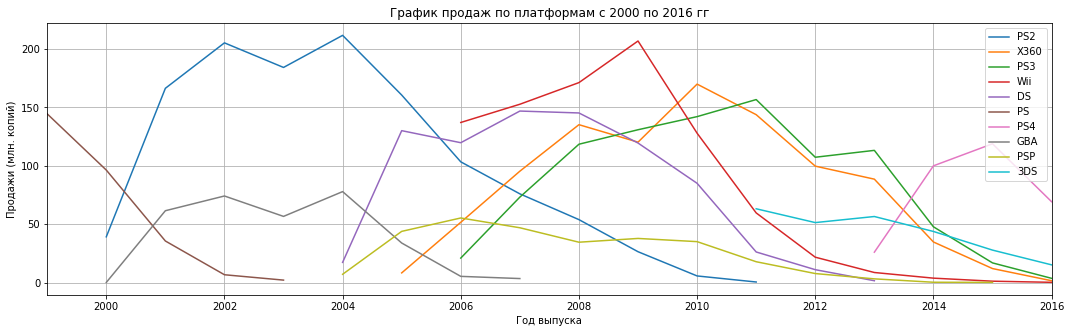

In [36]:
platforms = ['PS2','X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']
for _ in platforms:
    (data.query('platform == @_')
     .groupby('year_of_release')['total_sales'].sum()
     .plot(figsize=(18,5),
           grid=True,
           legend=True,
           xlim=(1999,2016),
           title='График продаж по платформам с 2000 по 2016 гг',
           xlabel='Год выпуска',
           ylabel='Продажи (млн. копий)'))
plt.legend(platforms);

Видим, что у всех платформ схожий путь: рост продаж в течение 2-3 лет с даты выпуска платформы, затем спад и прекращение продаж.

Всё достаточно логично. Как только платформа выпустилась, она вызывает огромный интерес, для нее издают новейшие игры, продажи растут. С течением времени технологии устаревают, создаются более совершенные консоли с более современной и крутой графикой. Внимание игроков и издателей игр переключается на новые продукты, что мы и видим на графике.

Таким образом актуальным периодом для изучения зависимостей будет 3 года. Примерный срок успеха платформы.

### Динамика продаж игр за актуальнй период

Далее будем рассматривать только данные за актуальный период 2014 - 2016 г.

In [37]:
data = data.query('year_of_release > 2013').reset_index()

Посмотрим лидеров по продажам за данный период.

In [38]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

И посмотри динамику продаж за последние 3 года.

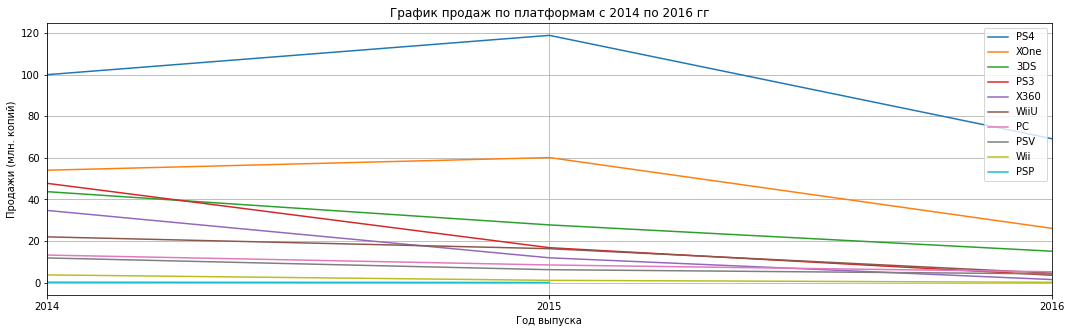

In [39]:
platforms = ['PS4','XOne','3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP', ]
for _ in platforms:
    (data.query('platform == @_')
     .groupby('year_of_release')['total_sales'].sum()
     .plot(figsize=(18,5),
           grid=True,
           legend=True,
           xlim=(2014,2016),xticks=[2014,2015,2016],
           title='График продаж по платформам с 2014 по 2016 гг',
           xlabel='Год выпуска',
           ylabel='Продажи (млн. копий)'))
plt.legend(platforms);

Видим, что картина схожая для всех платформ в Топ10 - повсеместный спад продаж. Т.к. данные за 2016 год неполные, то ,возможен, дальнейший рост продаж. PS4 и XBox One были выпущены только год назад (в 2013) и могли еще не достичь пика продаж.

Выберем 5 самых продаваемых платформ , как наиболее потенциально прибыльные.

In [40]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).nlargest(5)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
Name: total_sales, dtype: float64

In [41]:
platforms_top5 = ['PS4', 'XOne', '3DS', 'PS3', 'X360']
data_top = data.query('platform == @platforms_top5')

### "Ящики с усами" по глобальным продажам игр

Построим "ящики с усами" для 5 наших лидеров по продажам.

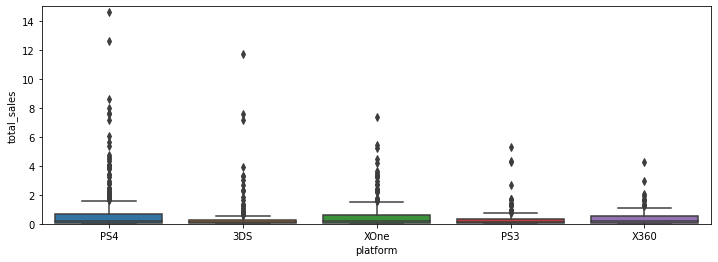

In [42]:
plt.figure(figsize=(12,4))
sns.boxplot(data=data_top,y='total_sales', x='platform').set(ylim=(0,15));

Видим, что имеются выбросы, которые мешают нормально воспринимать графики. Зададим лимиты по оси y, чтобы можно было поближе рассмотрть ящики.

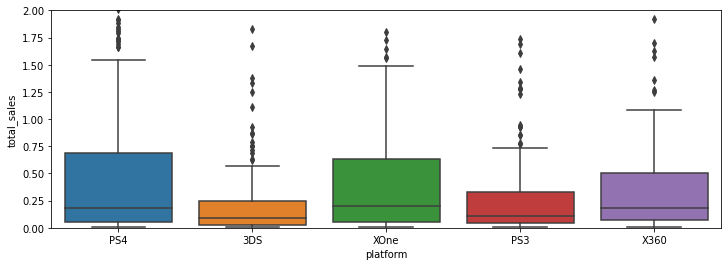

In [43]:
plt.figure(figsize=(12,4))
sns.boxplot(data=data_top,y='total_sales', x='platform').set(ylim=(0,2));

In [44]:
data_top.query('platform == "PS4"')['total_sales'].describe()

count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: total_sales, dtype: float64

In [45]:
data_top.query('platform == "XOne"')['total_sales'].describe()

count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: total_sales, dtype: float64

In [46]:
data_top.query('platform == "3DS"')['total_sales'].describe()

count    212.000000
mean       0.408868
std        1.188368
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: total_sales, dtype: float64

In [47]:
data_top.query('platform == "PS3"')['total_sales'].describe()

count    219.000000
mean       0.311324
std        0.633059
min        0.010000
25%        0.040000
50%        0.110000
75%        0.325000
max        5.270000
Name: total_sales, dtype: float64

In [48]:
data_top.query('(platform == "PS4" or platform == "3DS") and total_sales > 10')

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
1,42,Grand Theft Auto V,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68


Видим, что у PS4 и XOne схожие "ящики с усами" : как медианные значения, так и первый и третий квартили.
Медиана около 200 тыс. копий и большая часть значений от 50 до 690 тыс. копий. Это самый новые платформы и логично, что игры для них больше продаются. И это два прямых конкурента на рынке.

Остальные платформы из Топ5 - это PS3 и Xbox360 - предыдущие версии PS4 и XOne. По ним количесво продаж заметно меньше, чем у своих младших братьев. Для них уже не выпускают (либо совсем в небольших количествах) новых игр.

И отдельный достаточно нишевый продукт Nintendo 3DS - портативная приставка. Большая часть значений количества проданных копий расположилась от 30 тыс. до 250 тыс. копий.

При этом у каждой платформы имеются выбросы. Предполагаю, что это игры-хиты, которые продавались в аномальных количествах. У PS4 ,например, - это Call of Duty и GTAV. У Nintendo 3DS - Pokemon.

### Влияние на продажи  отзывов пользователей и критиков для одной платформы

Для определения влияния на продажи игр PS4 отзывов пользователей и критиков построим диаграммы рассеяния и посчитаем коэффициент корреляции. Посмотрим есть ли прямая зависимость между этими величинами.

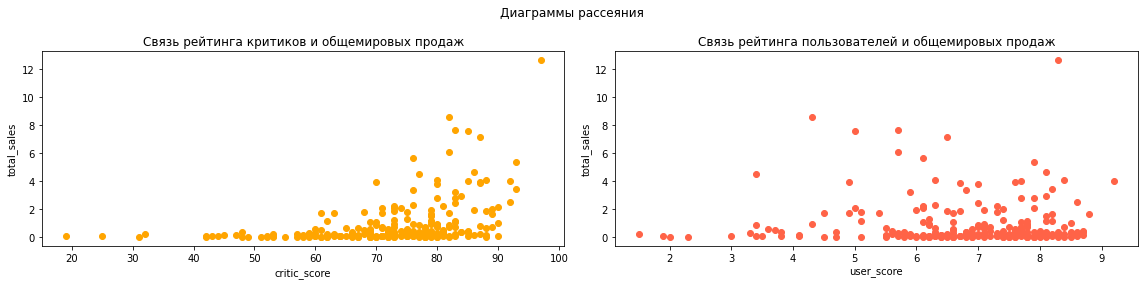

In [49]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(16,4))
ax[0].scatter(data_top.query('platform == "PS4"')['critic_score'], data_top.query('platform == "PS4"')['total_sales'],
              color='orange')
ax[0].set_xlabel('critic_score')
ax[0].set_ylabel('total_sales')
ax[0].set_title('Связь рейтинга критиков и общемировых продаж')


ax[1].scatter(data_top.query('platform == "PS4"')['user_score'], data_top.query('platform == "PS4"')['total_sales'],
             color='tomato')
ax[1].set_xlabel('user_score')
ax[1].set_ylabel('total_sales')
ax[1].set_title('Связь рейтинга пользователей и общемировых продаж')

fig.suptitle('Диаграммы рассеяния')
plt.tight_layout();

Видим, что высокий рейтинг критиков положительно влияет на продажи игр, но лишь для части игр. На основную массу внизу графика оценки не сильно повлияли. Связь просматривается, но не сильная.

При этом рейтинг пользователей не показывает наличией какой-либо связи с продажами.

In [50]:
data_top.query('platform == "PS4"')['critic_score'].corr(data_top.query('platform == "PS4"')['total_sales'])

0.40266141068104083

In [51]:
data_top.query('platform == "PS4"')['user_score'].corr(data_top.query('platform == "PS4"')['total_sales'])

-0.040131589472697356

Значения коэффициентов кореляции только подтвердили наши предположения.


### Влияние на продажи  отзывов пользователей и критиков для остальных платформ

Построим графики рассеяния и посчитаем коэффициенты корреляции для остальных платформ из Топ5.

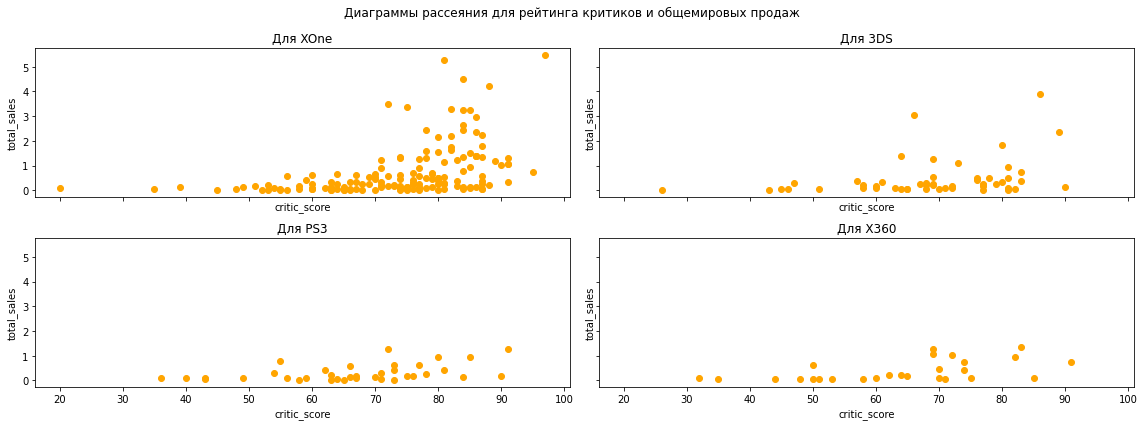

In [52]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(16,6), sharex=True,sharey=True)
fig.suptitle('Диаграммы рассеяния для рейтинга критиков и общемировых продаж')
plt.tight_layout()

ax[0,0].scatter(data_top.query('platform == "XOne"')['critic_score'], data_top.query('platform == "XOne"')['total_sales'],
              color='orange')
ax[0,0].set_xlabel('critic_score')
ax[0,0].set_ylabel('total_sales')
ax[0,0].set_title('Для XOne')

ax[0,1].scatter(data_top.query('platform == "3DS"')['critic_score'], data_top.query('platform == "3DS"')['total_sales'],
              color='orange')
ax[0,1].set_xlabel('critic_score')
ax[0,1].set_ylabel('total_sales')
ax[0,1].set_title('Для 3DS')

ax[1,0].scatter(data_top.query('platform == "PS3"')['critic_score'], data_top.query('platform == "PS3"')['total_sales'],
              color='orange')
ax[1,0].set_xlabel('critic_score')
ax[1,0].set_ylabel('total_sales')
ax[1,0].set_title('Для PS3')

ax[1,1].scatter(data_top.query('platform == "X360"')['critic_score'], data_top.query('platform == "X360"')['total_sales'],
              color='orange')
ax[1,1].set_xlabel('critic_score')
ax[1,1].set_ylabel('total_sales')
ax[1,1].set_title('Для X360')

plt.tight_layout();

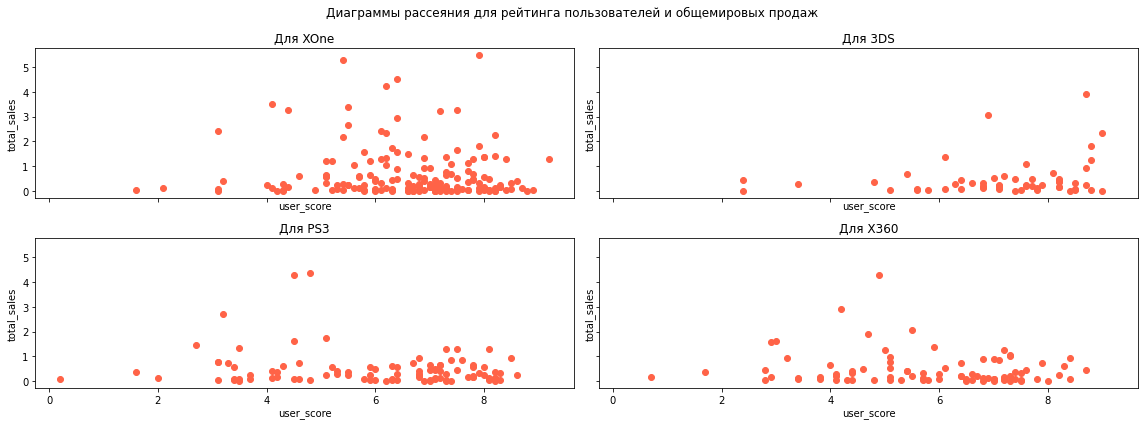

In [53]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(16,6), sharex=True,sharey=True)
fig.suptitle('Диаграммы рассеяния для рейтинга пользователей и общемировых продаж')
plt.tight_layout()

ax[0,0].scatter(data_top.query('platform == "XOne"')['user_score'], data_top.query('platform == "XOne"')['total_sales'],
              color='tomato')
ax[0,0].set_xlabel('user_score')
ax[0,0].set_ylabel('total_sales')
ax[0,0].set_title('Для XOne')

ax[0,1].scatter(data_top.query('platform == "3DS"')['user_score'], data_top.query('platform == "3DS"')['total_sales'],
              color='tomato')
ax[0,1].set_xlabel('user_score')
ax[0,1].set_ylabel('total_sales')
ax[0,1].set_title('Для 3DS')

ax[1,0].scatter(data_top.query('platform == "PS3"')['user_score'], data_top.query('platform == "PS3"')['total_sales'],
              color='tomato')
ax[1,0].set_xlabel('user_score')
ax[1,0].set_ylabel('total_sales')
ax[1,0].set_title('Для PS3')

ax[1,1].scatter(data_top.query('platform == "X360"')['user_score'], data_top.query('platform == "X360"')['total_sales'],
              color='tomato')
ax[1,1].set_xlabel('user_score')
ax[1,1].set_ylabel('total_sales')
ax[1,1].set_title('Для X360')

plt.tight_layout();

In [54]:
data_top.pivot_table(index='platform',values=['critic_score','total_sales'], aggfunc='corr').reset_index()

,platform,level_1,critic_score,total_sales
0,3DS,critic_score,1.000000,0.314117
1,3DS,total_sales,0.314117,1.000000
2,PS3,critic_score,1.000000,0.446575
3,PS3,total_sales,0.446575,1.000000
4,PS4,critic_score,1.000000,0.402661
5,PS4,total_sales,0.402661,1.000000
6,X360,critic_score,1.000000,0.525723
7,X360,total_sales,0.525723,1.000000
8,XOne,critic_score,1.000000,0.428677
9,XOne,total_sales,0.428677,1.000000


In [55]:
data_top.pivot_table(index='platform',values=['user_score','total_sales'], aggfunc='corr').reset_index()

,platform,level_1,total_sales,user_score
0,3DS,user_score,0.215193,1.000000
1,3DS,total_sales,1.000000,0.215193
2,PS3,user_score,-0.166761,1.000000
3,PS3,total_sales,1.000000,-0.166761
4,PS4,user_score,-0.040132,1.000000
5,PS4,total_sales,1.000000,-0.040132
6,X360,user_score,-0.138445,1.000000
7,X360,total_sales,1.000000,-0.138445
8,XOne,user_score,-0.070384,1.000000
9,XOne,total_sales,1.000000,-0.070384


По остальным платформамиз Топ5 картина схожая с PS4. Оценки критиков влияют на продажи, про оценки пользователей так сказать не можем.

Коэффициенты корреляции для оценок критиков варьируются от 0.31 до 0.52, что говорит о наличии хоть слабой, но связи между величинами. Т.к. коэффициент положительный, то зависимость прямопропорциональная. 

Для оценок пользователей коэффициент корреляции близится к нулю или является отрицательным (от 0.2 до -0.16), что говорит об очени слаблой либо о полном отсутствии какой-либо связи. Т.к. коэффициент отрицательный, то возможная зависисимость - обратная пропорциональность, что довольно странно применительно к оценкам.

### Распределение игр по жанрам

Посмотрим, как распределены продажи по жанрам

In [56]:
data_top.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False)

,total_sales
genre,
action,175.17
shooter,159.68
sports,105.88
role-playing,88.95
misc,26.32
fighting,21.55
racing,19.69
adventure,14.47
platform,10.97


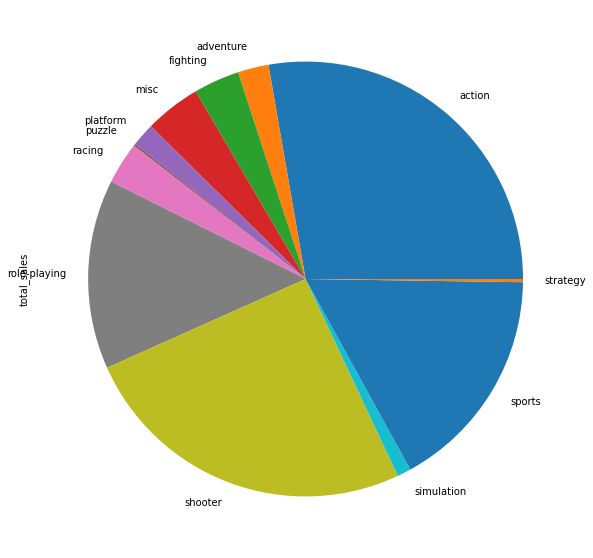

In [57]:
(data_top
.pivot_table(index='genre',values='total_sales',aggfunc='sum')
.plot(y='total_sales', kind='pie', figsize=(10,10), legend=False));

Видим, что самые прибыльные жанры - это шутеры, экшн игры, спортивные игры и ролевые игры. На них приходится наибольшая прибыль. Думаю, что большая выручка по этим жанрам связана в том числе и с тем, что это мультиплеерные жанры, а также по ним проходят соревнования (касается шутеров и спортивных игр). Во многих играх этих жанров присутствуют встроенные покупки.

Самые непопулярные жанры - это стратегии, симуляторы, пазлы и платформеры.

Построим "ящик с усами" и изучим распределение продаж по жанрам.

Text(0.5, 1.0, 'Распределение продаж в зависимости от жанра')

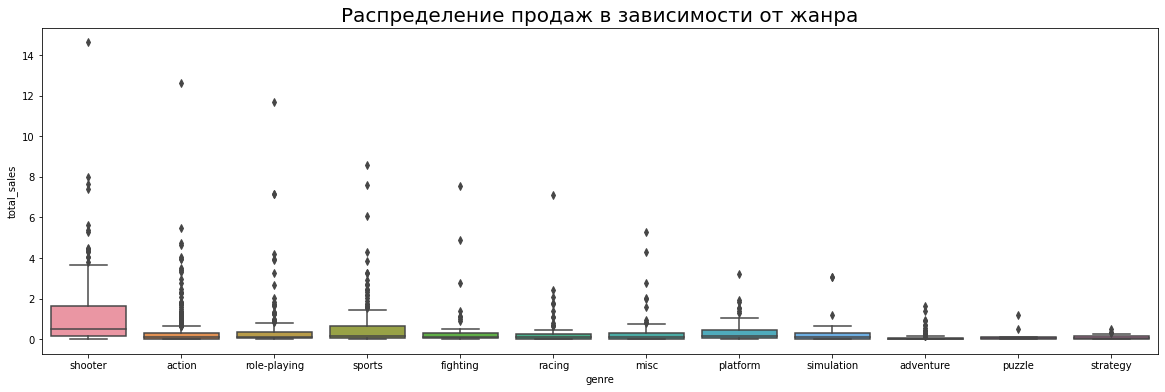

In [58]:
plt.figure(figsize=(20,6))
boxpl = sns.boxplot(y=data['total_sales'], x=data['genre'])
boxpl.set_title("Распределение продаж в зависимости от жанра",fontsize=20)

Выбросы мешают рассмотреть графики получше. У шутеров, экшн ролевых игр превышают 10 млн. проданных копий! Зададим верхний предел значений на уровне 75 процентиля жанра шутеров.

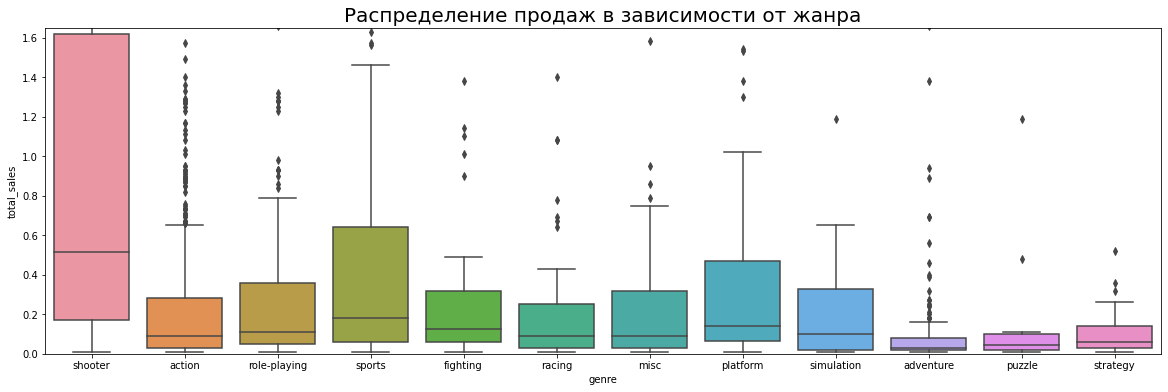

In [59]:
plt.figure(figsize=(20,6))
boxpl = sns.boxplot(y=data['total_sales'], x=data['genre'])
boxpl.set_title("Распределение продаж в зависимости от жанра",fontsize=20)
boxpl.set_ylim(0,1.65);

Из графика видим, что наиболее стаблилен по продажам жанр шутеров. У него самая большая медиана (около 0,5 млн копий) и 50% игр продаются в количестве от 200 тыс. до 1,6 млн копий.

У спортивных игр и платформеров результаты поскромне - медианное значение в районе 150-200 тыс. копий, 50% игр продаются в количестве от 50 тыс. до 650 тыс у спорта и до 500 тыс. у платформеров.

Ролевые игры по величине медианы и разбросу значений находится на том же уровне, что и экшн, файтинги, гонки, симуляторы и сборная солянка из игр (misc).

У приключенческих игр, пазлов и стратегий самые низкие медианные значения и 75 процентиль.

Интересны графики у экшн и прикоюченческих игр: с достаточно маленькой медианой эти жанры имеют большое количество выбросов - хитов. 

У многих жанров выбросы мощнейшим образом влияют на общие продажи.

### Выводы

В ходе исследовательского анализа пришли к следующему:
1. Срок жизни платформы составляет 6-8 лет с 2-3 годами роста продаж. Затем идет спад
2. Наиболее популярная платформа в мире за промежуток 2014-2016 - PS4.
3. Пользовательские оценки не влияют на продажи, оценки критиков - отчасти.
4. Наиболее прибыльные жанры - это шутеры, экшн игры, спортивные игры и ролевые игры

## Портрет пользователя каждого региона (NA, EU, JP)

### Самые популярные платформы (Топ-5) в каждом регионе

Посмотрим отличаются ли продажи игр разных платформ в каждом регионе.

In [60]:
regions = ['na_sales','eu_sales', 'jp_sales', 'other_sales']
reg_name = ['Северная Америка', 'Европа', 'Япония', 'Другие страны']

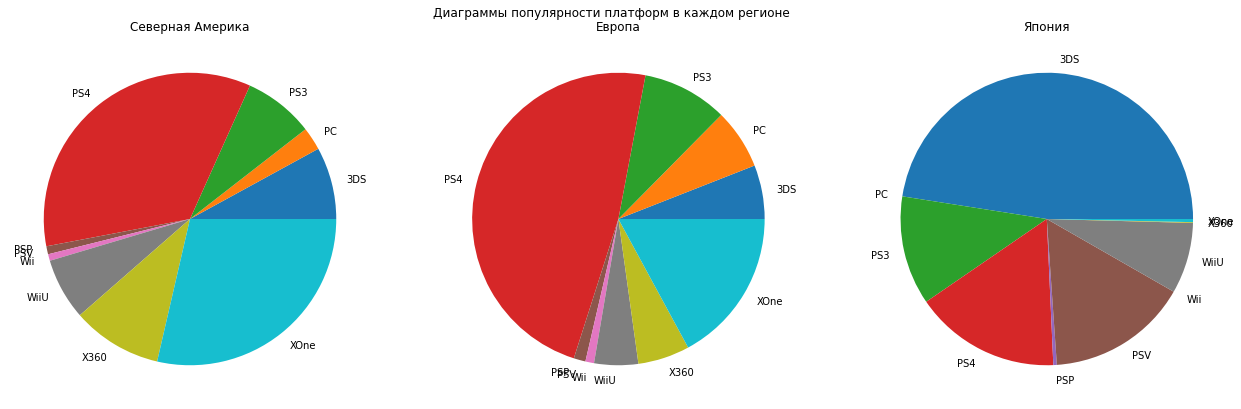

In [61]:
fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(18,6))
fig.suptitle('Диаграммы популярности платформ в каждом регионе')
plt.tight_layout()

for i in range(3):
    reg_data = data.groupby(by='platform')[regions[i]].sum().reset_index()
    axs[i].pie(reg_data[regions[i]], labels=reg_data['platform'])
    axs[i].set_title(reg_name[i])


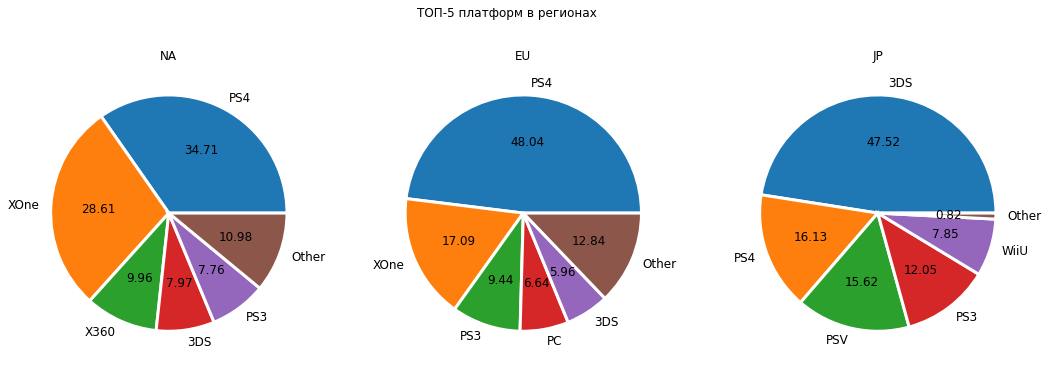

In [62]:
# задаем список регионов
countries = data.columns[5:8]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
  # выберем 5 самых продающих платформ
  df_i = (data.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Other_platforms
  df_i = (df_i.append({'platform': 'Other', countries[i]: data[countries[i]].sum() 
                       - df_i[countries[i]].sum()}, ignore_index= True)
         )
    
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'], autopct='%.2f',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'large'})

  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

Посмотрим численные значения

In [63]:
data.groupby(by='platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

,platform,na_sales,eu_sales,jp_sales
0,3DS,22.64,16.12,44.24
1,PC,7.23,17.97,0.00
2,PS3,22.05,25.54,11.22
3,PS4,98.61,130.04,15.02
4,PSP,0.00,0.00,0.36
5,PSV,2.52,3.53,14.54
6,Wii,2.08,2.59,0.00
7,WiiU,19.36,13.15,7.31
8,X360,28.30,15.49,0.08
9,XOne,81.27,46.25,0.32


In [64]:
for i in range(3):
    print(reg_name[i])
    print(data.groupby(by='platform')[regions[i]].sum().sort_values(ascending=False).head(5))
    print()

Северная Америка
platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

Европа
platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

Япония
platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64



Видим, что рынки США и Европы очень похожи. При этом в Северной Америке продажи для PS4 и XBox One примерно равны, а в Европе PS4 значительно превосходит все остальные платформы, в том числе и XBox One.

В Японии совершенно другая картина. Лидерство держит 3DS, а PS4 делит второе место с двумя другими продуктами Sony. Видим, что в Японии более популярны игры для портативных консолей: PSV (PlayStation Vita) и 3DS.

### Самые популярные жанры (Топ-5) в каждом регионе

Посмотрим есть ли различия в жанровых пристрастиях геймеров в каждом регионе.

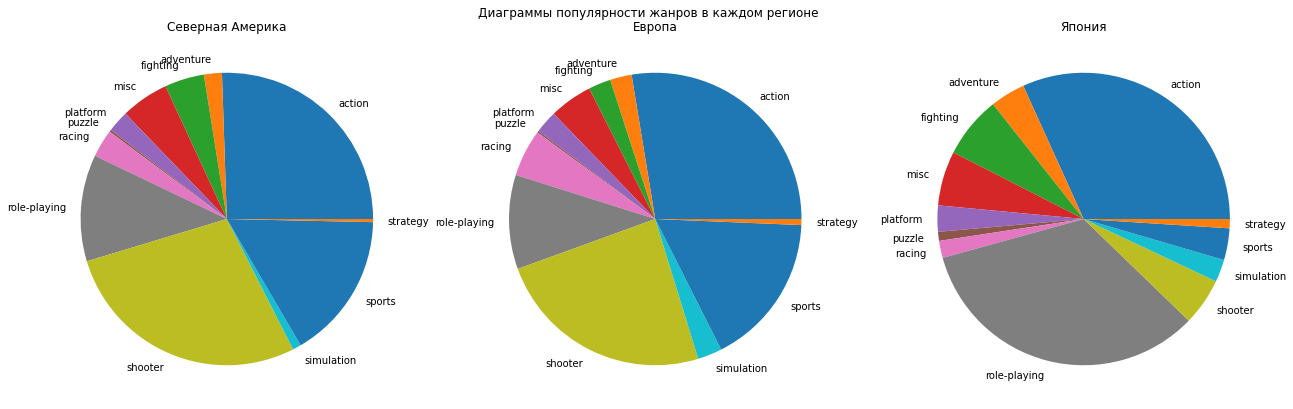

In [65]:
fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(18,6))
fig.suptitle('Диаграммы популярности жанров в каждом регионе')
plt.tight_layout()

for i in range(3):
    reg_data = data.groupby(by='genre')[regions[i]].sum().reset_index()
    axs[i].pie(reg_data[regions[i]], labels=reg_data['genre'])
    axs[i].set_title(reg_name[i])

In [66]:
data.groupby(by='genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

,genre,na_sales,eu_sales,jp_sales
0,action,72.53,74.68,29.58
1,adventure,5.64,6.49,3.60
2,fighting,12.43,6.69,6.37
3,misc,15.05,12.86,5.61
4,platform,6.79,6.80,2.69
5,puzzle,0.65,0.52,0.93
6,racing,8.74,14.13,1.76
7,role-playing,33.47,28.17,31.16
8,shooter,79.02,65.52,4.87
9,simulation,2.63,7.30,2.31


In [67]:
for i in range(3):
    print(reg_name[i])
    print(data.groupby(by='genre')[regions[i]].sum().sort_values(ascending=False).head(5))
    print()

Северная Америка
genre
shooter         79.02
action          72.53
sports          46.13
role-playing    33.47
misc            15.05
Name: na_sales, dtype: float64

Европа
genre
action          74.68
shooter         65.52
sports          45.73
role-playing    28.17
racing          14.13
Name: eu_sales, dtype: float64

Япония
genre
role-playing    31.16
action          29.58
fighting         6.37
misc             5.61
shooter          4.87
Name: jp_sales, dtype: float64



Видим, что Европа и США также схожи. В лидерах шутеры, экшн-игры, спортивные и ролевые игры. 

В Японии преобладают ролевые игры и экшн-игры.

### Влияние рейтинга ESRB на продажи в отдельном регионе

Посмотрим, как влияет рейтинг ESRB на продажи в различных регионах.

In [68]:
data.groupby(by='rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

,rating,na_sales,eu_sales,jp_sales
0,E,50.74,58.06,8.94
1,E10+,33.23,26.16,4.46
2,M,96.42,93.44,8.01
3,RP,64.72,58.95,56.90
4,T,38.95,34.07,14.78


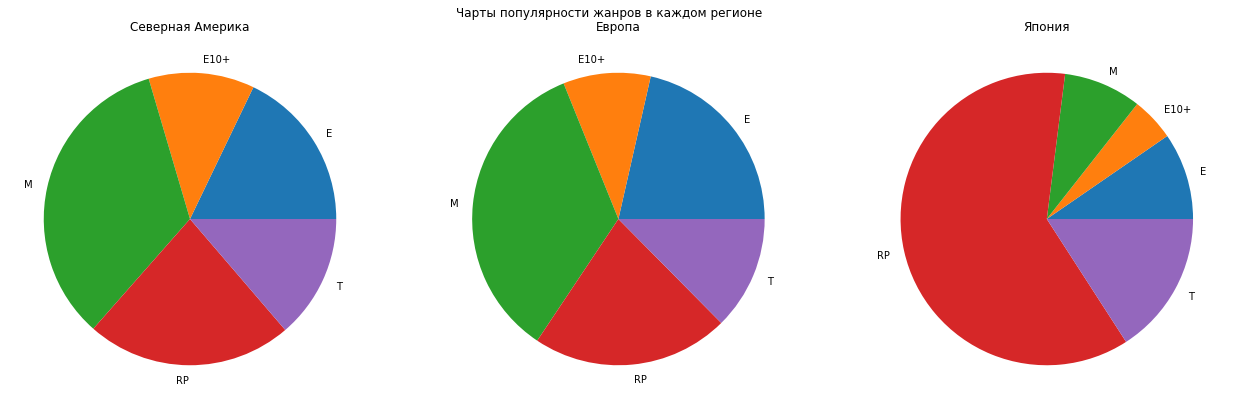

In [69]:
fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(18,6))
fig.suptitle('Чарты популярности жанров в каждом регионе ')
plt.tight_layout()

for i in range(3):
    reg_data = data.groupby(by='rating')[regions[i]].sum().reset_index()
    axs[i].pie(reg_data[regions[i]], labels=reg_data['rating'])
    axs[i].set_title(reg_name[i])

Видим, что в Северной Америке и Европе практически идентичные распределения продаж по рейтингу ESRB. Преобладают игры для взрослых. Следом идут игры для любого возраста и игры для подростков.

В Японии наибольшие продажи приносят игры для подростков и для любого возраста. Наблюдаем огромное количество игр, ожидающих получение рейтинга (более 60%), что непосредственно влияет на результат исследования. Предполагаю, что это связано с тем, что модель рейтингов ESRB - это американская модель. А в Японии имеется своя организация -  CERO. Вероятно, многие игры просто не оценены в ESRB, т.к. для продажи на локальном рынке данный рейтинг не требуется и рейтинг присуждается по системе CERO.

### Выводы

1. Рынки представленных Северной Америки и Европы во многом схожи и имеют лишь небольшие различия.
2. Рынок Японии более уникален и самобытен и  резко контрастируют с другими регоинами.

## Проверка гипотез

Проверим следующие гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.

### Гипотеза 1

Обозначим нулевую и альтернативную гипотезы.

H0 Нулевая гипотеза:средний пользовательский рейтинг платформ Xbox One и PC равны.

H1 Альтернативная гипотеза: средний пользовательский рейтинг платформ Xbox One и PC не равны.

Для проверки гипотезы воспользуемся специальным методом scipy.stats.ttest_ind. 
Если уровень статистической значимости (p-value) окажется меньше порогового значения (alpha), то нулевая гипотеза отвергается. Зададим пороговое значение alpha равным 0.05.

In [70]:
xbox_rating = data.query('user_score.notna() and platform == "XOne"')['user_score']
pc_rating = data.query('user_score.notna() and platform == "PC"')['user_score']

In [71]:
alpha = 0.05

results = st.ttest_ind(xbox_rating, pc_rating)

print('p-значение:', results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Полученное p-значение показывает: при условии, что нулевая гипотеза верна, вероятность случайно получить такие или более выраженные различия равна 10%. 

Нулевую гипотезу отвергнуть не можем.


In [72]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


Посмотрим на средние значения продаж:

In [73]:
pc_rating.mean()

6.298360655737705

In [74]:
xbox_rating.mean()

6.594545454545456

Разница между средними действительно небольшая.

### Гипотеза 2

Обозначим нулевую и альтернативную гипотезы.

H0 Нулевая гипотеза:средний пользовательский рейтинг жанров Action и Sports равны.

H1 Альтернативная гипотеза: средний пользовательский рейтинг жанров Action и Sports не равны.

In [75]:
action_rating = data.query('user_score.notna() and genre == "action"')['user_score']
sports_rating = data.query('user_score.notna() and genre == "sports"')['user_score']

alpha = 0.05

results = st.ttest_ind(action_rating, sports_rating)

print('p-значение:', results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Полученное p-значение показывает: при условии, что нулевая гипотеза верна, вероятность случайно получить такие или более выраженные различия равна крайне малому числу - менее уровня статистической значимости.

Таким образом отбрасываем нулевую гипотезу - средний пользовательский рейтинг жанров action и sports не равны.

In [76]:
action_rating.mean()

6.760606060606061

In [77]:
sports_rating.mean()

5.2251968503937

## Выводы

По результатам исследования пришли к следующим выводам.

1. Мы видим, что рынок поделён между 3 большими компаниями. 

2. При планировании выпуска нового продукта необходимо учитывать регион, в котором будет выпускаться игра. Японский рынок очень отличается от Европейского и Северо-Американского.

3. За последние 3 года наиболее популярными платформами в Европе были PS4, Microsoft XboxOne, а в Японии - Nintendo 3DS. Я бы делал ставку либо на них, либо на более новые поколения данных платформ.

4. В Северной Америке и Европе более популярны шутеры, экшн - и спортивные игры. В Японии - ролевые игры.

5. В Северной Америке и Европе лучше продаются игры для взрослой аудитории. В Японии многим играм (более 50%) не присвоен рейтинг ESRB, у них имеется своя система - CERO.

Выходит такой портрет успешной игры в каждом регионе.

In [78]:
results = pd.DataFrame({
    'Region': ['Северная Америка', 'Европа', 'Япония'], 
               'Platform': ['PS4, XOne', 'PS4', '3DS'], 
               'Genre': ['Shooter, Action, Sport','Shooter, Action, Sport', 'Role-Playing, Action'],
               'ESRB Rating': ['M, E','M, E', 'T,E']}) 
results

,Region,Platform,Genre,ESRB Rating
0,Северная Америка,"PS4, XOne","Shooter, Action, Sport","M, E"
1,Европа,PS4,"Shooter, Action, Sport","M, E"
2,Япония,3DS,"Role-Playing, Action","T,E"
